In [8]:
library(data.table)
library(dplyr)
library(ggplot2)
setwd("~/Documents/Data Science 17-18/Data Science Fundamental Notes/Project/THG-Jarvis")
trans <- fread("MAIN_transaction_data.csv")

Warning message in fread("MAIN_transaction_data.csv"):
“Bumped column 24 to type character on data row 13575, field contains '7fx'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE.”Warning message in fread("MAIN_transaction_data.csv"):
“Bumped column 25 to type character on data row 13575, field contains 'GB'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be l

In [10]:
str(trans)

Classes ‘data.table’ and 'data.frame':	418334 obs. of  25 variables:
 $ Order_Number                 : int  67028670 67077956 67077956 67077956 67077956 67085417 67094633 67094633 67094633 67095935 ...
 $ Account_Key                  : int  19534992 19535774 19535774 19535774 19535774 19535579 10805060 10805060 10805060 19534656 ...
 $ Delivery_Option_Type_Key     : int  5 1 1 1 1 5 1 1 2 1 ...
 $ Order_Date_Key               : int  20160301 20160301 20160301 20160301 20160301 20160301 20160301 20160301 20160301 20160301 ...
 $ Payment_Method_Key           : int  7 11 11 11 11 67 9 9 9 -1 ...
 $ Locale_Key                   : int  9 3 3 3 3 12 3 3 3 3 ...
 $ Order_Sequence_No            : int  1 1 1 1 1 1 9 9 9 1 ...
 $ Medium_Key                   : int  48 106 106 106 106 48 59 59 59 106 ...
 $ Campaign_Key                 : int  4659 2 2 2 2 123588 125903 125903 125903 2 ...
 $ Order_Payment_Status_Key     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Payment_Provider_Key         : int  1 1 1 1

In [12]:
unique(trans$Empty1)

[1] ""         "7fx"      "CA"       "2jt"      "JAPAN"    "GB"      
 [7] "32300"    "IE"       "8SQ"      "FR"       "EN10 6PA"

In [14]:
del_key <- fread("delivery_option_lookup.csv")
colnames(del_key) <- c("Delivery_Option_Type_Key", "Name")

In [15]:
trans_del <- trans %>% 
  left_join(del_key) %>% 
  group_by(Name) %>% 
  summarise(n = n()) 

Joining, by = "Delivery_Option_Type_Key"


In [18]:
trans <- trans %>% 
  left_join(del_key)
str(del_key)

Joining, by = c("Delivery_Option_Type_Key", "Name")


Classes ‘data.table’ and 'data.frame':	22 obs. of  2 variables:
 $ Delivery_Option_Type_Key: int  -1 1 2 3 4 5 6 7 8 9 ...
 $ Name                    : chr  "Unknown" "Standard" "Next Day" "Saturday" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [19]:
del_features <- data.frame(Name = as.character(unique(trans$Name)), 
                           destination = c(rep("int", 3), rep("dom", 6)),
                           priority = c("priority", rep("slow", 2), rep("priority", 2), rep("slow", 4)),
                           occupation = c(rep("unknown", 5), "working", "unknown", "working", "unknown"))

In [20]:
trans <- trans %>% 
  left_join(del_features, by = "Name")

Warning message:
“Column `Name` joining character vector and factor, coercing into character vector”

In [21]:
trans_del <- trans %>% 
  group_by(Name) %>% 
  summarise(n = n())

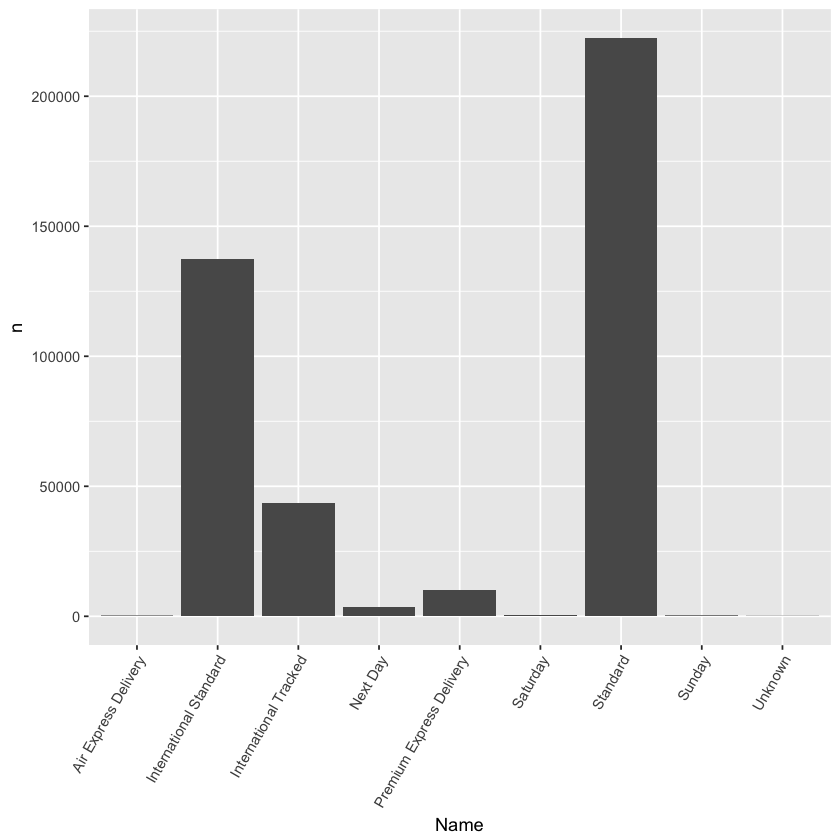

In [22]:
trans_del %>% 
  ggplot(aes(x = Name, y = n)) +
  geom_col() +
  theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [24]:
head(trans)

Order_Number,Account_Key,Delivery_Option_Type_Key,Order_Date_Key,Payment_Method_Key,Locale_Key,Order_Sequence_No,Medium_Key,Campaign_Key,Order_Payment_Status_Key,⋯,Postcode_Shipping_Address,Country_Code_Shipping_Address,Postcode_Billing_Address,Country_Code_Billing_Address,Empty1,Empty2,Name,destination,priority,occupation
67028670,19534992,5,20160301,7,9,1,48,4659,0,⋯,4814,AU,4814,AU,,,International Standard,int,priority,unknown
67077956,19535774,1,20160301,11,3,1,106,2,0,⋯,Cf54ts,GB,Cf54ts,GB,,,Standard,int,slow,unknown
67077956,19535774,1,20160301,11,3,1,106,2,0,⋯,Cf54ts,GB,Cf54ts,GB,,,Standard,int,slow,unknown
67077956,19535774,1,20160301,11,3,1,106,2,0,⋯,Cf54ts,GB,Cf54ts,GB,,,Standard,int,slow,unknown
67077956,19535774,1,20160301,11,3,1,106,2,0,⋯,Cf54ts,GB,Cf54ts,GB,,,Standard,int,slow,unknown
67085417,19535579,5,20160301,67,12,1,48,123588,0,⋯,92806,US,92806,US,,,International Standard,int,priority,unknown


# Reliable customers

In [25]:
customers <- trans %>% 
  group_by(Account_Key) %>% 
  mutate(count = n()) %>% 
  group_by(count) %>% 
  summarise(n = n()) 

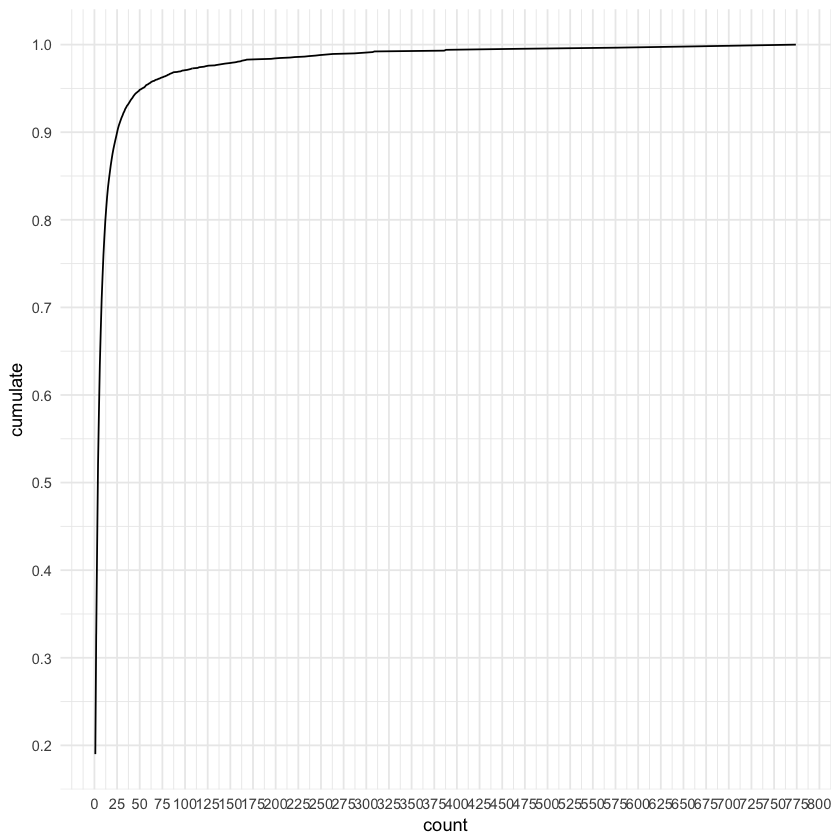

In [26]:
customers$prop <- customers$n/dim(trans)[1]  
customers$cumulate <- cumsum(customers$prop)
customers %>% 
  ggplot(aes(x = count, y = cumulate)) +
  geom_line() +
  scale_x_continuous(breaks = seq(0, 800, by = 25)) +
  scale_y_continuous(breaks = seq(0, 800, by = 0.1)) +
  theme_minimal()

In [27]:
payment_hists <- trans %>% 
  group_by(Account_Key) %>% 
  mutate(pay_key_num = as.numeric(Order_Payment_Status_Key),
         num_valid = length(which(pay_key_num == 0)),
         count = n(),
         prop = num_valid/count,
         status = ifelse(prop <= 0.25 & count > 2, "questionable",
                         ifelse(prop <= 0.25 & count <= 2, "insufficient",
                                ifelse(prop > 0.25 & prop < 0.75, "adequate", "fine"))))


In [28]:
cancelled_items <- trans %>% 
  group_by(Category_Level_3, Category_Level_2) %>% 
  mutate(canc_prop = ifelse(Cancelled_Qty == 0, 0, Cancelled_Qty/Ordered_Qty))

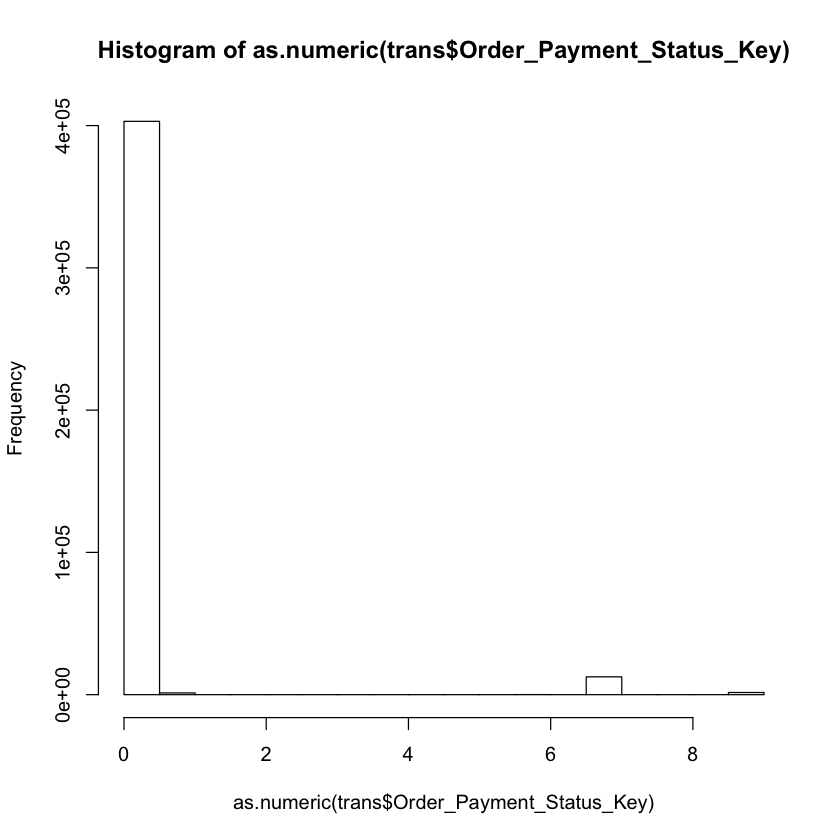

In [29]:
hist(as.numeric(trans$Order_Payment_Status_Key))

In [30]:
bill_ship_match <- trans %>% 
  mutate(status = ifelse(Postcode_Billing_Address != Postcode_Shipping_Address, "mismatch", "fine"))

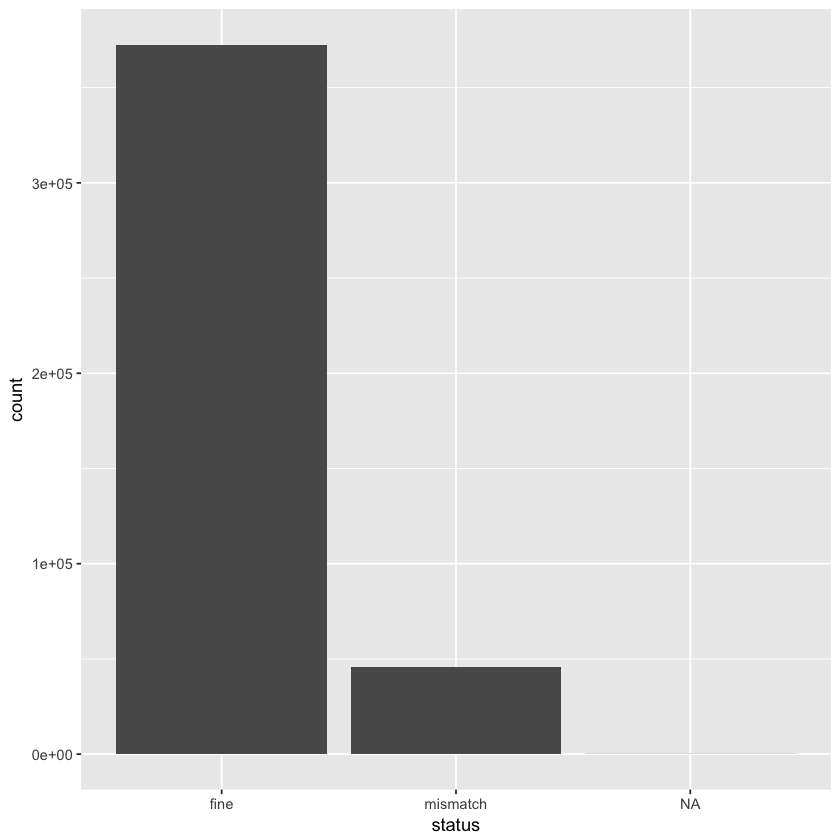

In [31]:
bill_ship_match %>% 
  ggplot(aes(x = status)) +
  geom_bar(stat = "count")

In [32]:
table(bill_ship_match$status)


    fine mismatch 
  372594    45647 